In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dgresult3.txt",sep=" ")
data_arr = np.array(data)

In [3]:
data.head(15)

,order,Nx,err
0,1,1,4.572320e-02
1,2,1,8.096270e-03
2,3,1,3.341740e-04
3,4,1,2.346240e-05
4,5,1,7.341830e-07
5,6,1,3.302590e-08
6,7,1,8.385650e-10
7,8,1,2.774980e-11
8,9,1,6.126210e-13
9,10,1,2.198240e-14


In [4]:
order = 10
Nx = 11

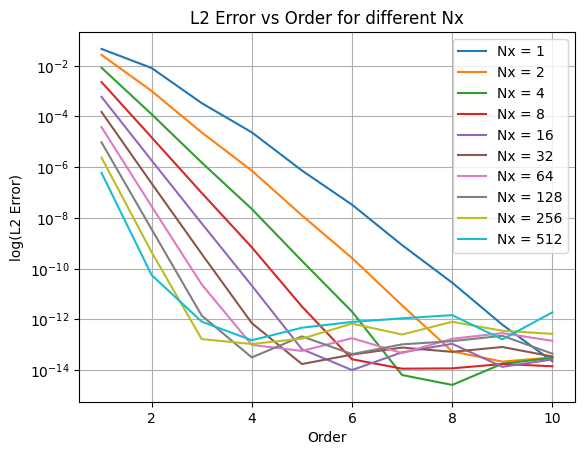

In [5]:
for i in range(0,Nx-1):
    plt.plot(data_arr[i*order:(i+1)*order,0],data_arr[i*order:(i+1)*order,2],label="Nx = "+str(2**i))
plt.legend()
plt.yscale("log")
plt.ylabel("log(L2 Error)")
plt.xlabel("Order")
plt.grid()
plt.title("L2 Error vs Order for different Nx")
plt.savefig("errVsorder.png",dpi=200)

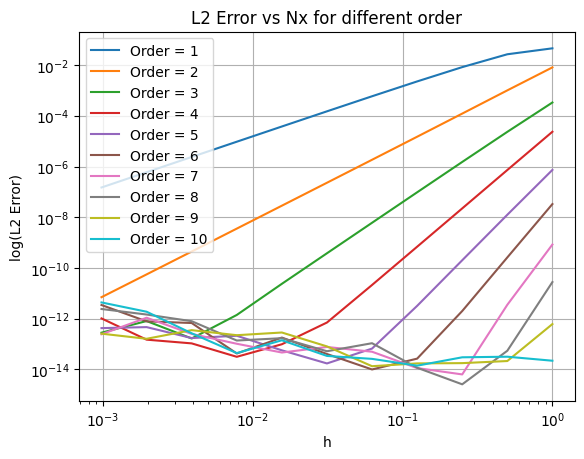

In [6]:
for i in range(0,order):
    h = 1.0/data_arr[i::order,1]
    ref = np.array([(h**(i+1))],).reshape(-1)
    plt.loglog(h,data_arr[i::order,2],label="Order = "+str(i+1))
    #plt.loglog(h,ref,label="O(1/h^"+str(i+1)+")",linestyle='--')
plt.legend()
#plt.yscale("log")
plt.ylabel("log(L2 Error)")
plt.xlabel("h")
plt.grid()
plt.title("L2 Error vs Nx for different order")
plt.savefig("errVsNx.png",dpi=200)

In [ ]:
fs=24

fName1 = './data/Fourier_P3_E 32_KN1.0E-02_Shakhov.dat'
data1 = np.loadtxt(fName1,skiprows=2)
print (data1.shape)
X = data1[:,0]
T1 = data1[:,1]



fName1 = './data/Fourier_P3_E 32_KN1.0E-01_Shakhov.dat'
data1 = np.loadtxt(fName1,skiprows=2)
print (data1.shape)
T2 = data1[:,1]

fName1 = './data/Fourier_P3_E 32_KN1.0E+00_Shakhov.dat'
data1 = np.loadtxt(fName1,skiprows=2)
print (data1.shape)
T3 = data1[:,1]



(201, 4)
(201, 4)
(201, 4)
(201, 4)


In [2]:
def read_fortran_data(filename):
    data1 = np.loadtxt(filename,skiprows=2)
    return data1 

def read_c_data(filename):
    cdata = pd.read_csv(filename,sep=" ",header=None)
    data_arr = np.array(cdata)
    return data_arr

In [3]:
def plot_compare(fortran_dat_path, cdat_path):
    data1 = np.loadtxt(fortran_dat_path,skiprows=2)
    print (data1.shape)
    T_fortran = data1[:,1]
    cdata = pd.read_csv(cdat_path,sep=" ",header=None)
    data_arr = np.array(cdata)

    plt.plot(data_arr[:,0],data_arr[:,1] ,label="Kn = 10.0",color='orange',linewidth=1.0)
    plt.plot(data1[:,0],T_fortran,linewidth=1.0,label="Reference")
    plt.grid()
    plt.legend()

In [7]:
fkn001 = read_fortran_data("./data/Fourier_P3_E100_KN1.0E-02_Shakhov.dat")
fkn01 = read_fortran_data("./data/Fourier_P3_E100_KN1.0E-01_Shakhov.dat")
fkn1 = read_fortran_data("./data/Fourier_P3_E100_KN1.0E+00_Shakhov.dat")
fkn10 = read_fortran_data("./data/Fourier_P3_E100_KN1.0E+01_Shakhov.dat")

ckn01 = read_c_data("data/kn01_E100_xref_vref_leftpoint.dat")
ckn1 = read_c_data("data/kn1_E100_xref_vref_leftpoint.dat")
ckn10 = read_c_data("data/kn10_E100_order3_fixed2.dat")

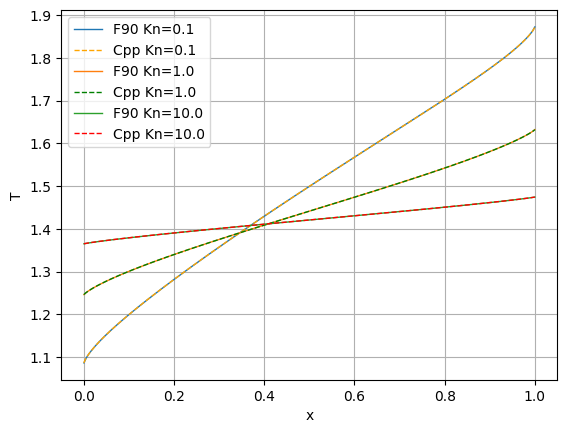

In [17]:
plt.plot(fkn01[:,0],fkn01[:,1],linewidth=1.0,label="F90 Kn=0.1")
plt.plot(ckn01[:,0],ckn01[:,1] ,label="Cpp Kn=0.1",color='orange',linewidth=1.0,linestyle='--')
plt.plot(fkn1[:,0],fkn1[:,1],linewidth=1.0,label="F90 Kn=1.0")
plt.plot(ckn1[:,0],ckn1[:,1] ,label="Cpp Kn=1.0",color='green',linewidth=1.0,linestyle='--')
plt.plot(fkn10[:,0],fkn10[:,1],linewidth=1.0,label="F90 Kn=10.0")
plt.plot(ckn10[:,0],ckn10[:,1] ,label="Cpp Kn=10.0",color='red',linewidth=1.0,linestyle='--')
plt.grid()
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.savefig("compare_diff_Kn.png",dpi=200)

In [18]:
f_uniform = read_fortran_data("./data/Fourier_P3_E100_KN1.0E+00_Shakhov_uniform.dat")
f_ununiform = read_fortran_data("./data/Fourier_P3_E100_KN1.0E+00_Shakhov.dat")

c_uniform = read_c_data("data/kn1_E100_noref_leftpoint.dat")
c_ununiform = read_c_data("data/kn1_E100_xref_vref_leftpoint.dat")

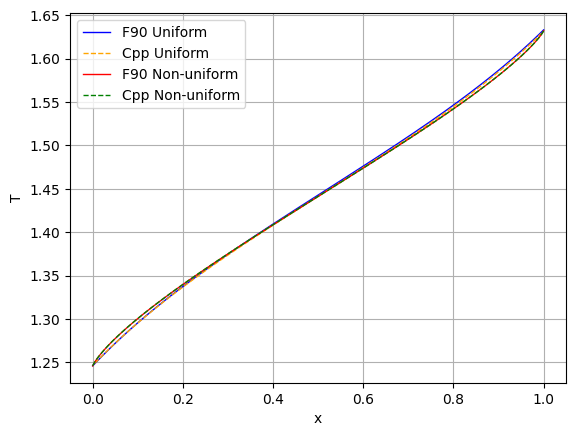

In [21]:
plt.plot(f_uniform[:,0],f_uniform[:,1],linewidth=1.0,label="F90 Uniform",color="blue")
plt.plot(c_uniform[:,0],c_uniform[:,1] ,label="Cpp Uniform",color='orange',linewidth=1.0,linestyle='--')
plt.plot(f_ununiform[:,0],f_ununiform[:,1],linewidth=1.0,label="F90 Non-uniform",color="red")
plt.plot(c_ununiform[:,0],c_ununiform[:,1] ,label="Cpp Non-uniform",color='green',linewidth=1.0,linestyle='--')
plt.grid()
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.savefig("compare_uniform_nonuniform.png",dpi=200)

In [23]:
f_16 = read_fortran_data("./data/Fourier_P3_E 16_KN1.0E+00_Shakhov.dat")
f_32 = read_fortran_data("./data/Fourier_P3_E 32_KN1.0E+00_Shakhov.dat")
f_64 = read_fortran_data("./data/Fourier_P3_E 64_KN1.0E+00_Shakhov.dat")
f_128 = read_fortran_data("./data/Fourier_P3_E128_KN1.0E+00_Shakhov.dat")

c_16 = read_c_data("data/kn1_E16.dat")
c_32 = read_c_data("data/kn1_E32.dat")
c_64 = read_c_data("data/kn1_E64.dat")
c_128 = read_c_data("data/kn1_E128.dat")

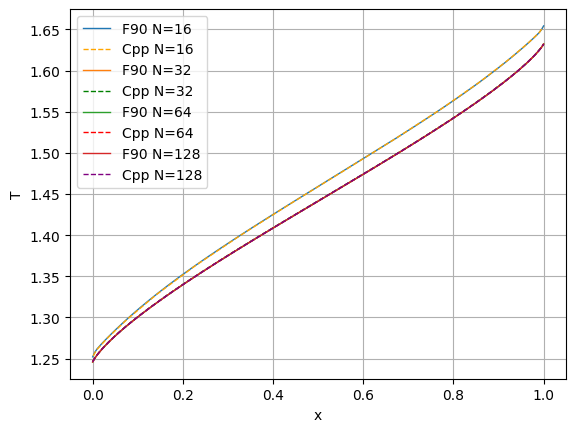

In [25]:
plt.plot(f_16[:,0],f_16[:,1],linewidth=1.0,label="F90 N=16")
plt.plot(c_16[:,0],c_16[:,1] ,label="Cpp N=16",color='orange',linewidth=1.0,linestyle='--')

plt.plot(f_32[:,0],f_32[:,1],linewidth=1.0,label="F90 N=32")
plt.plot(c_32[:,0],c_32[:,1] ,label="Cpp N=32",color='green',linewidth=1.0,linestyle='--')
plt.plot(f_64[:,0],f_64[:,1],linewidth=1.0,label="F90 N=64")
plt.plot(c_64[:,0],c_64[:,1] ,label="Cpp N=64",color='red',linewidth=1.0,linestyle='--')
plt.plot(f_128[:,0],f_128[:,1],linewidth=1.0,label="F90 N=128")
plt.plot(c_128[:,0],c_128[:,1] ,label="Cpp N=128",color='purple',linewidth=1.0,linestyle='--')
plt.grid()
plt.xlabel("x")
plt.ylabel("T")
plt.legend()

plt.savefig("compare_diff_Nx.png",dpi=200)

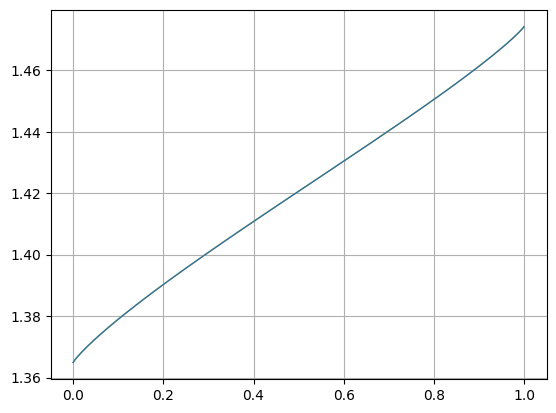

In [28]:
1.0003/0.999999601220002

1.0003003988997912

In [28]:
f_o1 = read_fortran_data("./data/Fourier_P1_E  8_KN1.0E+00_Shakhov.dat")
f_o2 = read_fortran_data("./data/Fourier_P2_E  8_KN1.0E+00_Shakhov.dat")
f_o3 = read_fortran_data("./data/Fourier_P3_E  8_KN1.0E+00_Shakhov.dat")

c_01 = read_c_data("data/kn1_S8_V100_o1.dat")
c_02 = read_c_data("data/kn1_S8_V100_o2.dat")
c_03 = read_c_data("data/kn1_S8_V100_o3.dat")

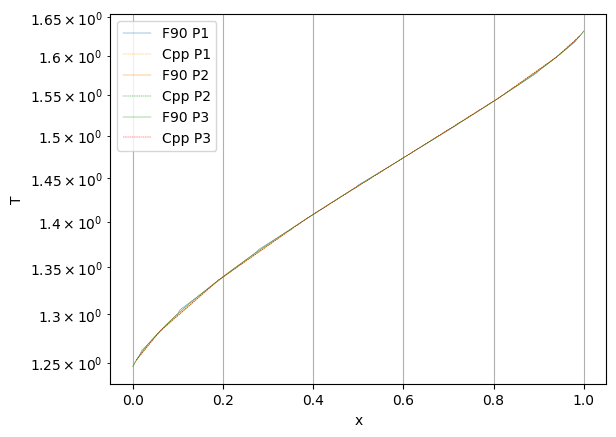

In [39]:
plt.plot(f_o1[:,0],f_o1[:,1],linewidth=0.3,label="F90 P1")
plt.plot(c_01[:,0],c_01[:,1] ,label="Cpp P1",color='orange',linewidth=0.3,linestyle='--')
plt.plot(f_o2[:,0],f_o2[:,1],linewidth=0.3,label="F90 P2")
plt.plot(c_02[:,0],c_02[:,1] ,label="Cpp P2",color='green',linewidth=0.3,linestyle='--')
plt.plot(f_o3[:,0],f_o3[:,1],linewidth=0.3,label="F90 P3")
plt.plot(c_03[:,0],c_03[:,1] ,label="Cpp P3",color='red',linewidth=0.3,linestyle='--')
plt.grid()
plt.xlabel("x")
plt.ylabel("T")
plt.yscale("log")
plt.legend()
plt.savefig("compare_diff_order.png",dpi=800)

In [32]:
flp = read_fortran_data("./data/Fourier_P3_E100_KN1.0E+01_Shakhov.dat")
ctrape = read_c_data("data/kn10_trape.dat")

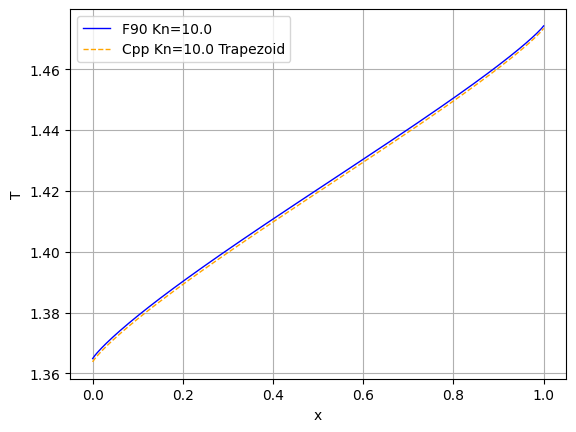

In [36]:
plt.plot(flp[:,0],flp[:,1],linewidth=1.0,label="F90 Kn=10.0",color='blue')
plt.plot(ctrape[:,0],ctrape[:,1] ,label="Cpp Kn=10.0 Trapezoid",color='orange',linewidth=1.0,linestyle="--")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("T")
plt.savefig("compare_kn10_trapezoid.png",dpi=200)